<a href="https://colab.research.google.com/github/LeelaKarthik-26/IT7103/blob/main/PDA_PROJECT_LUNG_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PDA PROJECT**
*Predicting Lung Cancer Survival Time*



Loading the Data
This data is a typical csv file with headers. We can use the default settings of **read_csv()**. We can then use **head()** to examine the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/PDA_project/lung_cancer_data.csv')
data.head(10)

Mounted at /content/drive


,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456
5,Patient0005,50,Male,Never Smoked,72.148656,Lower Lobe,Stage I,Surgery,49,Hispanic,...,34.813869,29.769655,0.825544,218.204614,8.711924,2.661053,142.782619,4.606625,135.497944,18.058525
6,Patient0006,68,Female,Current Smoker,19.122175,Middle Lobe,Stage I,Radiation Therapy,63,African American,...,31.016446,39.878953,0.799593,181.550728,8.089885,4.591886,75.377094,4.800980,138.373413,86.482339
7,Patient0007,48,Male,Current Smoker,68.095057,Lower Lobe,Stage IV,Chemotherapy,101,African American,...,12.208267,23.908107,1.436453,119.057097,9.367766,4.909359,99.511881,4.061255,136.347159,68.239920
8,Patient0008,52,Female,Former Smoker,25.299440,Lower Lobe,Stage I,Targeted Therapy,35,Caucasian,...,36.888358,35.822953,1.089169,197.791757,10.188013,3.326973,145.657154,4.767092,141.113503,96.808889
9,Patient0009,40,Male,Current Smoker,11.282767,Lower Lobe,Stage I,Surgery,19,Other,...,33.836074,44.230240,1.078794,227.048430,8.248718,3.173471,109.755478,4.075269,139.174855,68.595875


In [2]:
rows,columns = data.shape

print(" number of rows in the dataset : "+str(rows));
print(" number of columns in the dataset : "+str(columns));

 number of rows in the dataset : 23658
 number of columns in the dataset : 38


Our target in this data is **Survival Months**

# **Data Cleaning**

**.info()** attribute prints the number of rows and column in the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

To check whether the data contain null values.
we can use .isna() and It return 'True' or 'False' and the sum () function here is used to find the count of missing values in each column.

In [4]:
data.isna().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

So There are **no null values** in the any colounm in this Data Base. if there are any we can simply drop the colounms which have missing value by using **.dropna()** or we can replace the empty colounms with mean or median.

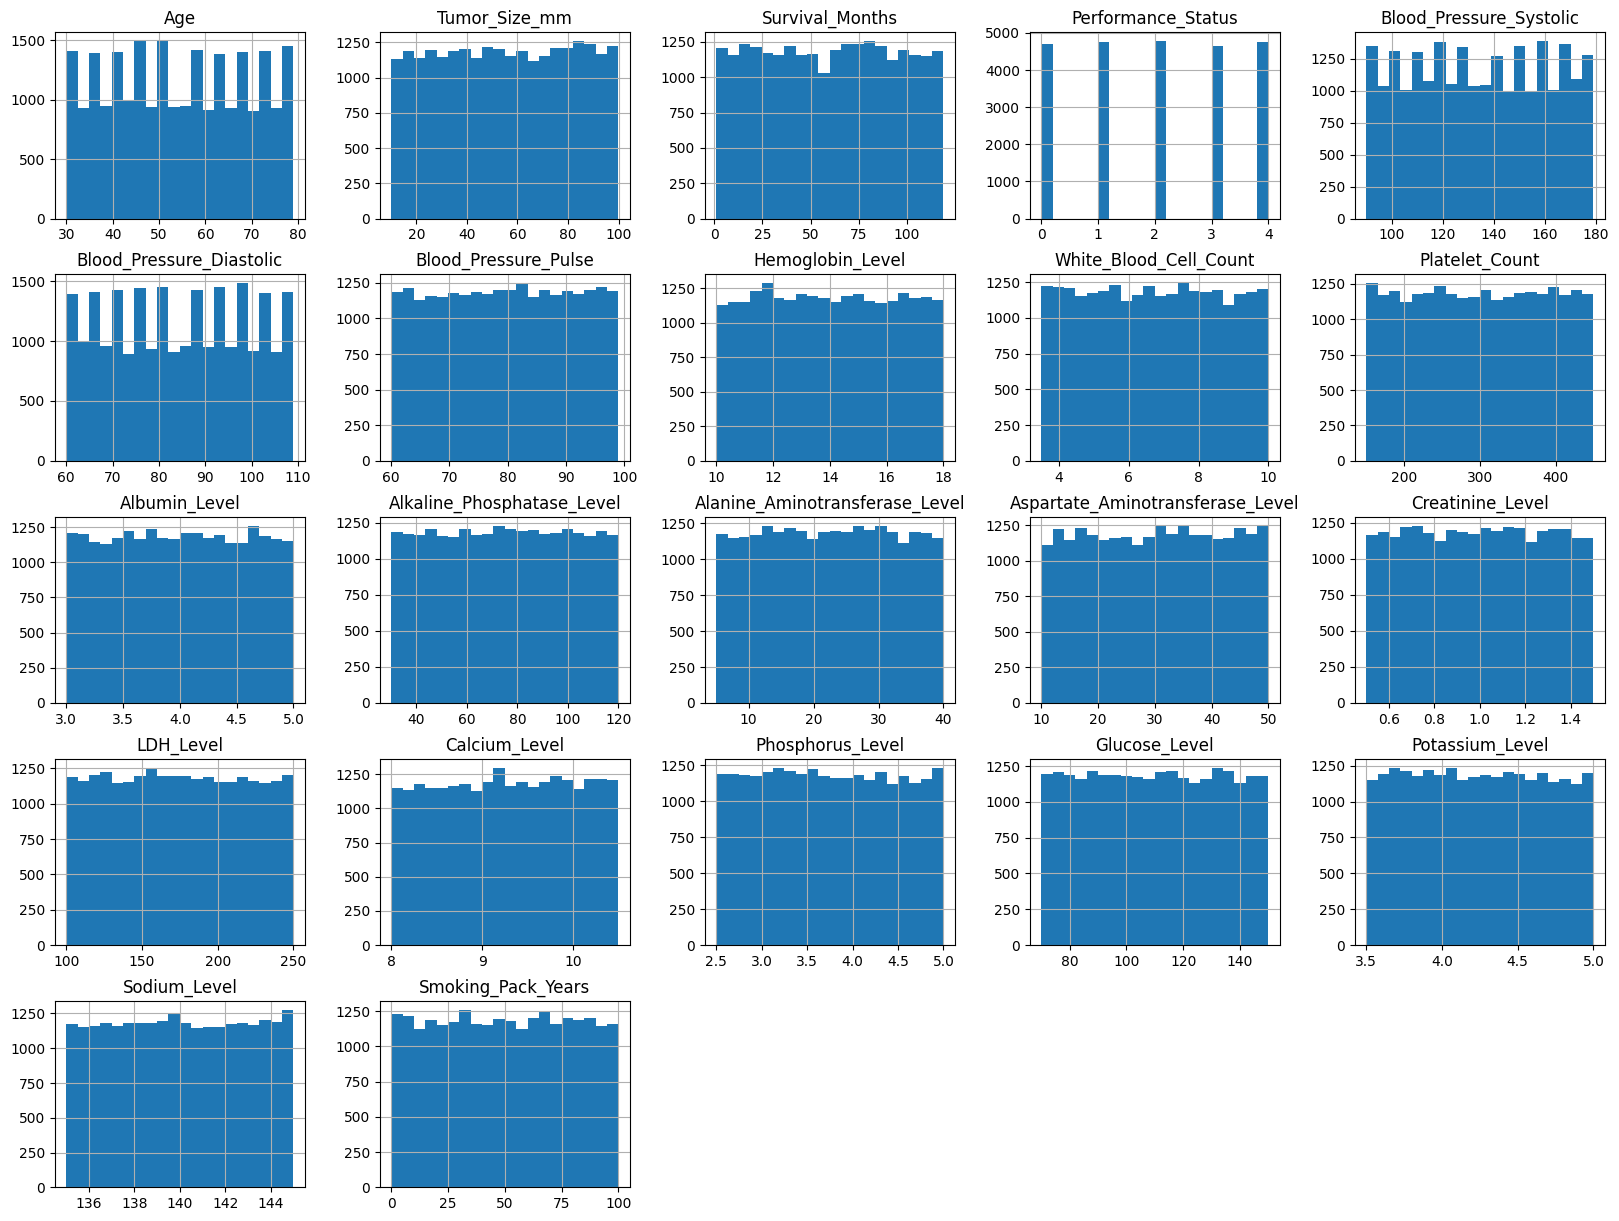

In [5]:
from matplotlib import pyplot as plt

data.hist(bins=20, figsize=(20,15))
plt.show()

We are dropping the columns which are not suited for this predection:



1. **Patient_ID**: This is just an identifier. so this not of intrest.
2. **Ethnicity, Insurance_Type:** This are not relevent to the target in this case. we can drop them.
3. **Performace_status:** The values in the colounms are very much simalar. it is a best to drop this coloumn.

**Combining the Comorbidities:** There are too many comorbidity columns (like Comorbidity_Diabetes, Comorbidity_Hypertension, etc.). so, we are combining them as one coloumn as there summary score. For the ease of coding.



In [6]:
print(data.columns)

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm',
       'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity',
       'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes',
       'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease',
       'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease',
       'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years'],
      dtype='object')


In [7]:
#dropping the irrelvent colounms
if 'Patient_ID' in data.columns:
    data = data.drop(['Patient_ID'],axis=1)
if 'Ethnicity' in data.columns:
    data = data.drop(['Ethnicity'],axis=1)
if 'Insurance_Type' in data.columns:
    data = data.drop(['Insurance_Type'],axis=1)
if 'Performance_Status' in data.columns:
    data = data.drop(['Performance_Status'],axis=1)

#combining the comorbidities as summary Score into one coloumn

# List of comorbidity columns
comorbidity_columns = [
    'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease',
    'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease',
    'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other'
]

# Convert comorbidity columns to numeric (1 for 'Yes', 0 for 'No')
data[comorbidity_columns] = data[comorbidity_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Create a new column 'Num_Comorbidities' that counts the number of comorbidities for each patient
data['Num_Comorbidities'] = data[comorbidity_columns].sum(axis=1)

# Drop the original comorbidity columns
data = data.drop(comorbidity_columns, axis=1)

# Print the updated DataFrame
print(data)

       Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location      Stage  \
0       68    Male  Current Smoker      81.678677     Lower Lobe  Stage III   
1       58    Male    Never Smoked      78.448272     Lower Lobe    Stage I   
2       44    Male   Former Smoker      67.714305     Lower Lobe    Stage I   
3       72    Male  Current Smoker      70.806008     Lower Lobe  Stage III   
4       37  Female    Never Smoked      87.272433     Lower Lobe   Stage IV   
...    ...     ...             ...            ...            ...        ...   
23653   45    Male   Former Smoker      91.279410    Middle Lobe    Stage I   
23654   31    Male  Current Smoker      45.139048     Upper Lobe   Stage IV   
23655   74    Male   Former Smoker      89.640323     Upper Lobe   Stage IV   
23656   47  Female   Former Smoker      45.770358    Middle Lobe    Stage I   
23657   64    Male   Former Smoker      13.460912     Upper Lobe    Stage I   

               Treatment  Survival_Months Family_Hi

# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(data, test_size=0.2)
traindata.shape, testdata.shape

((18926, 28), (4732, 28))

In [9]:
traindata.describe()

,Age,Tumor_Size_mm,Survival_Months,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,Albumin_Level,...,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years,Num_Comorbidities
count,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,...,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000
mean,54.432738,55.383307,59.818979,134.346296,84.521399,79.602716,13.996838,6.735906,300.032320,4.000353,...,30.102896,0.998686,175.001995,9.266799,3.743003,109.827462,4.246592,140.016164,49.994759,3.511254
std,14.383529,25.961461,34.273086,26.020228,14.452354,11.587849,2.303192,1.880846,86.991385,0.577553,...,11.568049,0.287536,43.330336,0.720274,0.723643,23.105333,0.432136,2.891916,28.868489,1.320804
min,30.000000,10.011606,1.000000,90.000000,60.000000,60.000000,10.000070,3.501213,150.017892,3.000080,...,10.000860,0.500001,100.010240,8.000018,2.500069,70.000420,3.500034,135.000934,0.016800,0.000000
25%,42.000000,33.090615,30.000000,112.000000,72.000000,70.000000,11.980959,5.111246,225.088272,3.503894,...,20.019405,0.747852,137.469915,8.644428,3.117031,89.819835,3.871930,137.522323,25.112687,3.000000
50%,54.000000,55.420856,60.000000,134.000000,85.000000,80.000000,13.984568,6.725128,300.245215,4.002747,...,30.204232,0.998829,174.913240,9.269392,3.727484,109.866406,4.246319,140.001165,50.005815,4.000000
75%,67.000000,78.065724,89.000000,157.000000,97.000000,90.000000,16.002967,8.354468,375.590584,4.502138,...,40.085429,1.248445,212.705257,9.890991,4.370001,130.013448,4.619508,142.520903,75.099710,4.000000
max,79.000000,99.990554,119.000000,179.000000,109.000000,99.000000,17.999957,9.998875,449.974734,4.999968,...,49.998571,1.499998,249.996391,10.499913,4.999974,149.997056,4.999911,144.999846,99.999493,7.000000


In [10]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols

['Age',
 'Tumor_Size_mm',
 'Survival_Months',
 'Blood_Pressure_Systolic',
 'Blood_Pressure_Diastolic',
 'Blood_Pressure_Pulse',
 'Hemoglobin_Level',
 'White_Blood_Cell_Count',
 'Platelet_Count',
 'Albumin_Level',
 'Alkaline_Phosphatase_Level',
 'Alanine_Aminotransferase_Level',
 'Aspartate_Aminotransferase_Level',
 'Creatinine_Level',
 'LDH_Level',
 'Calcium_Level',
 'Phosphorus_Level',
 'Glucose_Level',
 'Potassium_Level',
 'Sodium_Level',
 'Smoking_Pack_Years',
 'Num_Comorbidities']

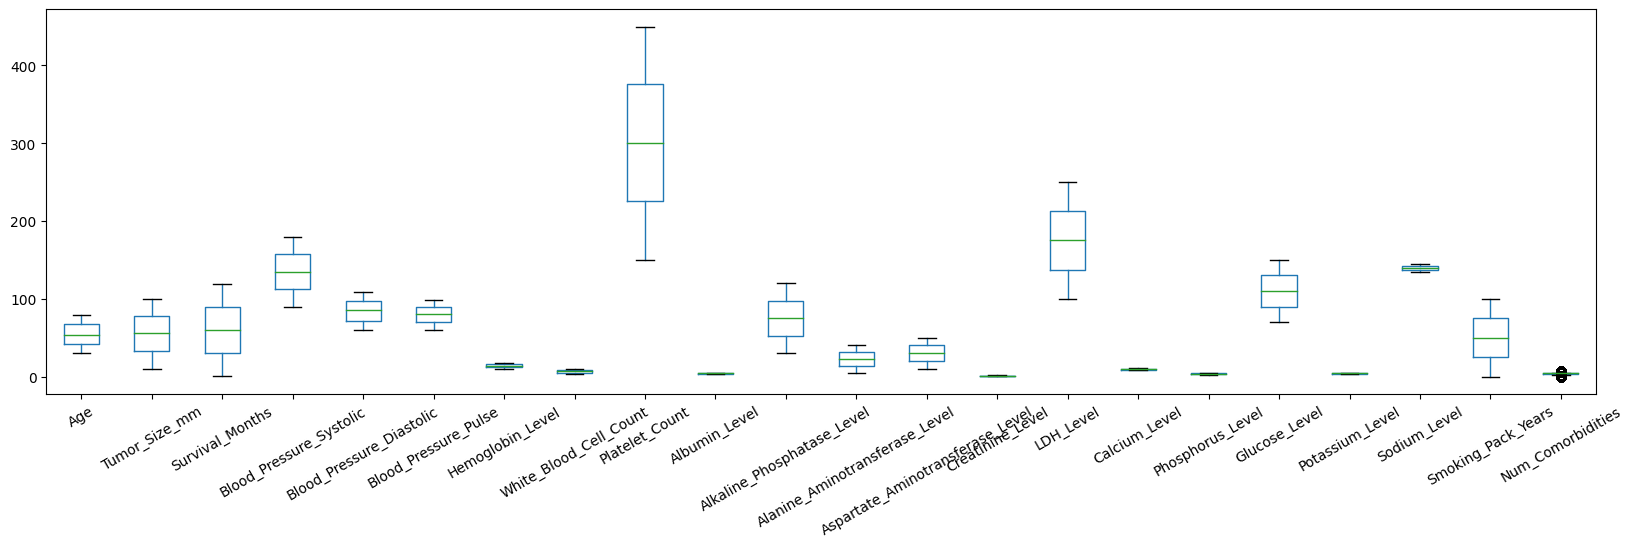

In [11]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

With a boxplot, we can clearly see that the numeric columns have very different ranges and for categorical columns, we can filter all that has dtypes of object.

In [12]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['Gender',
 'Smoking_History',
 'Tumor_Location',
 'Stage',
 'Treatment',
 'Family_History']

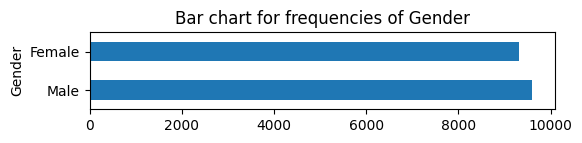

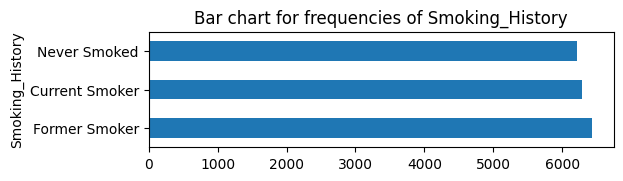

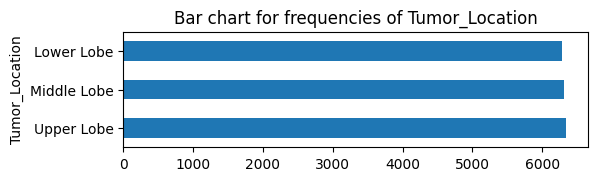

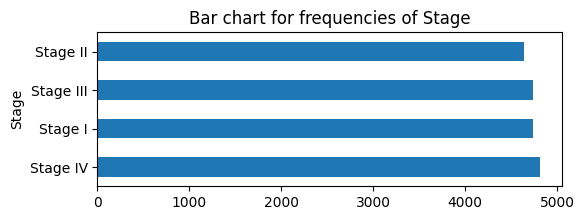

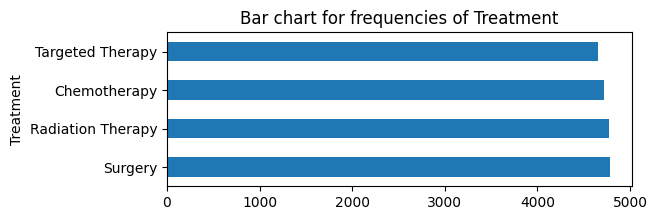

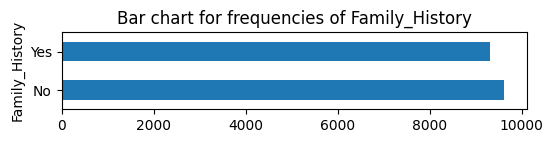

In [13]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (6,len(freq_table)*0.5))
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

**There are no colounms that are Skewed. so we don't need to do any transfermation on the numeric data. so, we are going to do the standardization and imputation on the numeric and catagorical data**


# **Data Preprocessing**

In [14]:
num_cols = ['Age', 'Tumor_Size_mm', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
             'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level',
             'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years', 'Num_Comorbidities']
cat_cols = ['Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Family_History']
target = 'Survival_Months'

In [15]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns                                                         #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [16]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['Age', 'Tumor_Size_mm',
                                  'Blood_Pressure_Systolic',
                                  'Blood_Pressure_Diastolic',
                                  'Blood_Pressure_Pulse', 'Hemoglobin_Level',
                                  'White_Blood_Cell_Count', 'Platelet_Count',
                                  'Albumin_Level', 'Alkaline_Phosphatase_Level',
                                  'Alanin...
                                  'Aspartate_Aminotransferase_Level',
                                  'Creatinine_Level', 'LDH_Level',
                                  'Calcium_Level', 'Phosphorus_Level',
                                  'Glucose_Level', 'Potassium_Level',
                                  'Sodium_Level', 'Smoking_Pack_Years',
                                  'Num_Comorbidities']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['Gender', 'Smoking_History', 'Tumor_Location',
                                  'Stage', 'Treatment', 'Family_History'])])

# **Modeling**

In this data set we have choosen the target as **Survival_Months**. so,  the target is a numarical value then we have to consider **Regression Models** for this target.

1. Linear regression
2. Decision tree Regression
3. Random forest Regression
4. Gradient Boosting Regressor
5. Bayesian Ridge Regression
6. Huber Regression

**Linear Regression**

In [17]:
#impoerting
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
from sklearn.linear_model import LinearRegression

# Define the pipeline
linear_pipeline = Pipeline([
    ('processing', processing_pipeline),  # Ensure this is defined properly
    ('modeling', LinearRegression())
])

param_grid = {
    'modeling__fit_intercept': [True, False],
}

# Create the GridSearchCV object with a reduced number of folds
grid_search = GridSearchCV(linear_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search object
grid_search.fit(traindata, traindata[target])

# Get the best model and print best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
linear_pred = best_model.predict(traindata)

# Evaluate the model
mse = mean_squared_error(traindata[target], linear_pred)
r2 = r2_score(traindata[target], linear_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best parameters: {'modeling__fit_intercept': True}
Mean Squared Error: 1173.0780061540197
R-squared: 0.001280759848987234


**Decission Tree Regression**

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Define Decision Tree Regression pipeline
dt_pipeline = Pipeline([
    ('processing', processing_pipeline),  # Use the imported processing_pipeline
    ('modeling', DecisionTreeRegressor())
])

# Define the parameter grid for Decision Tree Regression
param_grid = {
    'modeling__max_depth': [None, 10, 20],       # Maximum depth of the tree
    'modeling__min_samples_split': [2, 5],       # Minimum number of samples required to split an internal node
    'modeling__min_samples_leaf': [1, 2]         # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object with parallel processing
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search object on a subset of the data for quicker execution
sample_data = traindata.sample(frac=0.1, random_state=42)
grid_search.fit(sample_data, sample_data[target])

# Get the best model and print best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
dt_pred = best_model.predict(sample_data)

# Evaluate the model
mse = mean_squared_error(sample_data[target], dt_pred)
r2 = r2_score(sample_data[target], dt_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best parameters: {'modeling__max_depth': 10, 'modeling__min_samples_leaf': 1, 'modeling__min_samples_split': 5}
Mean Squared Error: 675.5815040600606
R-squared: 0.39673193282082586


**Random forest Regression**

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest Regression pipeline
rf_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling', RandomForestRegressor())
])

# Define a simplified parameter grid for Random Forest Regression
param_grid = {
    'modeling__n_estimators': [100],
    'modeling__max_depth': [None, 10],
    'modeling__min_samples_split': [2],
    'modeling__min_samples_leaf': [1]
}

# Create the GridSearchCV object with parallel processing
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search object on a subset of the data
sample_data = traindata.sample(frac=0.1, random_state=42)
grid_search.fit(sample_data, sample_data[target])

# Get the best model and print best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
rf_pred = best_model.predict(sample_data)

# Evaluate the model
mse = mean_squared_error(sample_data[target], rf_pred)
r2 = r2_score(sample_data[target], rf_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best parameters: {'modeling__max_depth': 10, 'modeling__min_samples_leaf': 1, 'modeling__min_samples_split': 2, 'modeling__n_estimators': 100}
Mean Squared Error: 541.0350862897601
R-squared: 0.5168766628147289


**Gradient Boosting Regressor**

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Define Gradient Boosting Regression pipeline
gb_pipeline = Pipeline([
    ('processing', processing_pipeline),  # Use the imported processing_pipeline
    ('modeling', GradientBoostingRegressor())
])

# Define a simplified parameter grid for Gradient Boosting Regression
param_grid = {
    'modeling__n_estimators': [100, 200],     # Number of boosting stages
    'modeling__learning_rate': [0.01, 0.1],   # Learning rate
    'modeling__max_depth': [3, 4],            # Maximum depth of the individual estimators
    'modeling__min_samples_split': [2, 5],    # Minimum number of samples required to split an internal node
    'modeling__min_samples_leaf': [1, 2]      # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    gb_pipeline, param_grid=param_grid, cv=3,  # Reduced number of folds
    scoring='neg_mean_squared_error', n_jobs=-1
)

# Fit the grid search object on a subset of the data
sample_data = traindata.sample(frac=0.1, random_state=42)
grid_search.fit(sample_data, sample_data[target])

# Get the best model and print best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
gb_pred = best_model.predict(sample_data)

# Evaluate the model
mse = mean_squared_error(sample_data[target], gb_pred)
r2 = r2_score(sample_data[target], gb_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best parameters: {'modeling__learning_rate': 0.01, 'modeling__max_depth': 3, 'modeling__min_samples_leaf': 1, 'modeling__min_samples_split': 5, 'modeling__n_estimators': 100}
Mean Squared Error: 1067.6113870112488
R-squared: 0.046664460068617686


**Bayesian Ridge Regression**

In [22]:
from sklearn.linear_model import BayesianRidge

# Define Bayesian Ridge Regression pipeline
br_pipeline = Pipeline([
    ('processing', processing_pipeline),  # Use the imported processing_pipeline
    ('modeling', BayesianRidge())
])

# Define the parameter grid for Bayesian Ridge Regression
param_grid = {
    'modeling__alpha_1': [1e-6, 1e-5, 1e-4],  # Hyperparameter for the initial precision of the weights
    'modeling__alpha_2': [1e-6, 1e-5, 1e-4],  # Hyperparameter for the precision of the weights
    'modeling__lambda_1': [1e-6, 1e-5, 1e-4], # Hyperparameter for the initial precision of the noise
    'modeling__lambda_2': [1e-6, 1e-5, 1e-4]  # Hyperparameter for the precision of the noise
}

# Create the GridSearchCV object
grid_search = GridSearchCV(br_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object
grid_search.fit(traindata, traindata[target])

# Get the best model and print best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
br_pred = best_model.predict(traindata)

# Evaluate the model
mse = mean_squared_error(traindata[target], br_pred)
r2 = r2_score(traindata[target], br_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best parameters: {'modeling__alpha_1': 1e-06, 'modeling__alpha_2': 0.0001, 'modeling__lambda_1': 0.0001, 'modeling__lambda_2': 1e-06}
Mean Squared Error: 1174.574818138072
R-squared: 6.424366164048401e-06


**Huber Regression**

In [23]:
from sklearn.linear_model import HuberRegressor

# Define Huber Regression pipeline
huber_pipeline = Pipeline([
    ('processing', processing_pipeline),  # Use the imported processing_pipeline
    ('modeling', HuberRegressor())
])

# Define the parameter grid for Huber Regression
param_grid = {
    'modeling__epsilon': [1.35, 1.5, 1.75, 2.0],       # The parameter epsilon controls the number of samples that should be classified as outliers
    'modeling__alpha': [0.0001, 0.001, 0.01, 0.1],    # Regularization strength
    'modeling__max_iter': [50, 100, 200]              # Maximum number of iterations
}

# Create the GridSearchCV object
grid_search = GridSearchCV(huber_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object
grid_search.fit(traindata, traindata[target])

# Get the best model and print best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
huber_pred = best_model.predict(traindata)

# Evaluate the model
mse = mean_squared_error(traindata[target], huber_pred)
r2 = r2_score(traindata[target], huber_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best parameters: {'modeling__alpha': 0.1, 'modeling__epsilon': 2.0, 'modeling__max_iter': 50}
Mean Squared Error: 1173.077816939619
R-squared: 0.0012809209397770527


# **Comparing all the models Performance**

In [24]:
# List of all pipelines
pipelines = [
    ('Linear Regression', linear_pipeline),
    ('Decision Tree Regression', dt_pipeline),
    ('Random Forest Regression', rf_pipeline),
    ('Gradient Boosting Regressor', gb_pipeline),
    ('Bayesian Ridge Regression', br_pipeline),
    ('Huber Regression', huber_pipeline)
]

In [25]:
# Dictionary to store results
results = {}

# Evaluate each model
for name, pipeline in pipelines:
    # Perform grid search or fit directly depending on your setup
    pipeline.fit(traindata, traindata[target])

    # Predict on the TESTING data for evaluation
    predictions = pipeline.predict(testdata)

    # Evaluate using metrics (e.g., MSE, R2)
    mse = mean_squared_error(testdata[target], predictions)
    r2 = r2_score(testdata[target], predictions)

    # Store results
    results[name] = {'MSE': mse, 'R2': r2}

# Print results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"MSE: {result['MSE']}")
    print(f"R2: {result['R2']}")
    print()

Model: Linear Regression
MSE: 1167.3805024081735
R2: -0.0017509340791599382

Model: Decision Tree Regression
MSE: 2460.152155536771
R2: -1.1111023481220714

Model: Random Forest Regression
MSE: 1192.4566132290788
R2: -0.02326921144124916

Model: Gradient Boosting Regressor
MSE: 1173.2953394265437
R2: -0.006826565799798789

Model: Bayesian Ridge Regression
MSE: 1165.3906314464152
R2: -4.338877535681185e-05

Model: Huber Regression
MSE: 1168.1966181869134
R2: -0.002451258216819241



# visualization Graphs for the comparision results

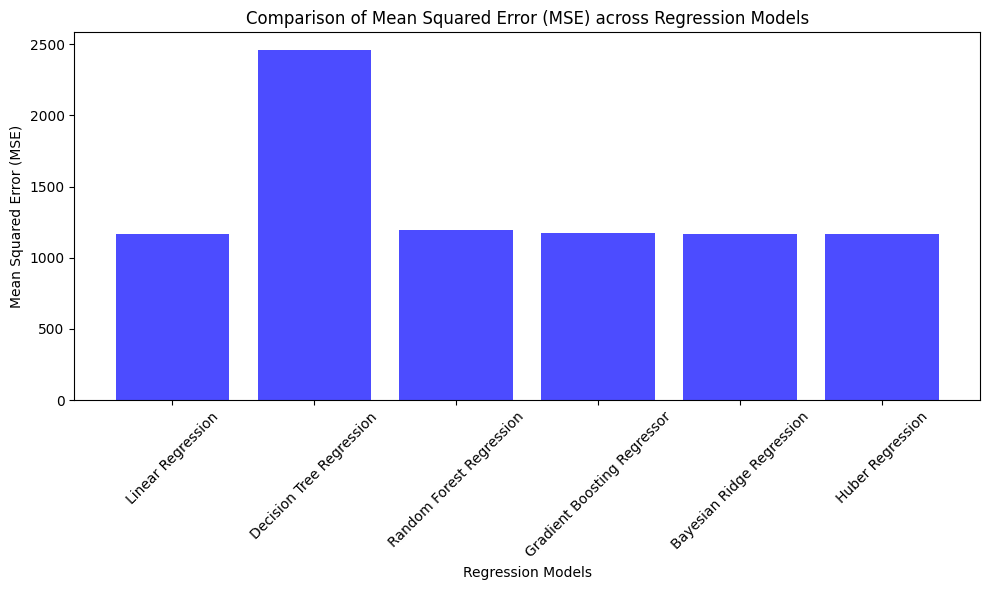

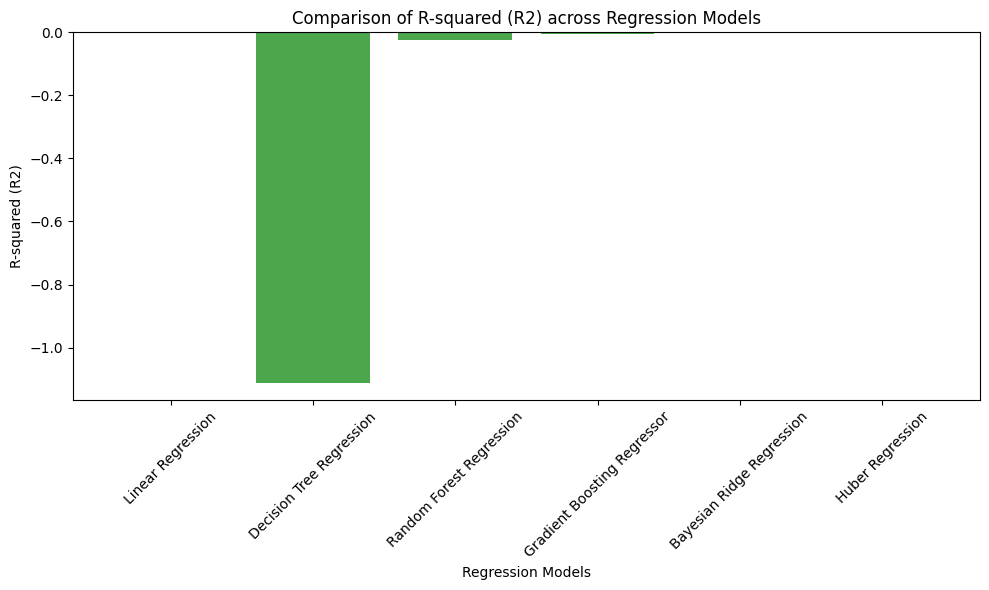

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
models = list(results.keys())
mse_values = [results[model]['MSE'] for model in models]
r2_values = [results[model]['R2'] for model in models]

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='blue', alpha=0.7)
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) across Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting R2
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='green', alpha=0.7)
plt.xlabel('Regression Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) across Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
